In [2]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel("English responses before encoding.xlsx")

## Data overview

In [4]:
df.shape

(135, 43)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 43 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Age                                    135 non-null    int64 
 1   Gender                                 135 non-null    object
 2   Current_residence                      135 non-null    object
 3   District                               135 non-null    object
 4   Parent_occupation                      135 non-null    object
 5   Displacement                           135 non-null    object
 6   Displaced_months                       135 non-null    object
 7   Parent_current_employment              135 non-null    object
 8   Experiencing_bombs                     135 non-null    object
 9   Family_member_loss                     135 non-null    object
 10  House_destruction                      135 non-null    object
 11  Separated_from_pare

In [6]:
df.describe()

,Age,Sleeping_before,Hypervigilance_after,Nightmares_before,Nightmares_after,Worry/fear_before,Worry/fear_after,Aggressive_behavior_before,Aggressive_behavior_after,Family/friends_withdrawal_before,Family/friends_withdrawal_after,Mood swings_before,Mood_swings_after,Avoid_war_topics_after,Mental_health_curently,Coping_family_and_friends,Coping_playing_games/sports,Coping_drawing/writing/reading,Coping_religious_practices,Coping_avoidance_of_triggers
count,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,9.207407,1.725926,2.348148,1.681481,2.185185,1.837037,2.748148,1.622222,2.081481,1.518519,1.844444,1.903704,2.377778,2.296296,8.333333,0.696296,0.503704,0.340741,0.140741,0.088889
std,0.838409,0.823440,1.148123,0.687325,0.993901,0.830459,1.188995,0.710966,1.000387,0.809015,1.035682,0.836429,1.049994,1.234299,1.501243,0.461569,0.501848,0.475724,0.349049,0.285643
min,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,10.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.500000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,9.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,10.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.columns

Index(['Age', 'Gender', 'Current_residence', 'District', 'Parent_occupation',
       'Displacement', 'Displaced_months', 'Parent_current_employment',
       'Experiencing_bombs', 'Family_member_loss', 'House_destruction',
       'Separated_from_parent', 'Food/water_shortages', 'Sleeping_before',
       'Hypervigilance_after', 'Nightmares_before', 'Nightmares_after',
       'Worry/fear_before', 'Worry/fear_after', 'Aggressive_behavior_before',
       'Aggressive_behavior_after', 'Family/friends_withdrawal_before',
       'Family/friends_withdrawal_after', 'Mood swings_before',
       'Mood_swings_after', 'Avoid_war_topics_after', 'Mental_health_curently',
       'Coping_family_and_friends', 'Coping_playing_games/sports',
       'Coping_drawing/writing/reading', 'Coping_religious_practices',
       'Coping_avoidance_of_triggers', 'Received_psychological_support',
       'Effectiveness', 'Attend_school_during', 'Attend_school_currently',
       'Academic_performance_after', 'Participation

In [8]:
df[df.duplicated()==True]

,Age,Gender,Current_residence,District,Parent_occupation,Displacement,Displaced_months,Parent_current_employment,Experiencing_bombs,Family_member_loss,...,Effectiveness,Attend_school_during,Attend_school_currently,Academic_performance_after,Participation_in_social_activities,Current_need_of_psychological_support,Current_need_of_educational_materials,Current_need_of_safe_housing,Current_need_of_medical_care,Current_need_of_food/water
64,10,Female,Original home,Mount Lebanon,Other,No,0,Other,No,No,...,NaN,"No, the child didn't attend school","Yes, at the same school as before",No change,"Yes, regularly",No,No,No,No,No


This duplicate is not removed bcz there may be similar cases of children as the study is limited to ages 8, 9, 10

In [9]:
# this index measures the symptoms before the war with lowest 0 and highest 5 for each attribute
df['index_before'] = df[['Sleeping_before', 'Nightmares_before','Worry/fear_before', 
                         'Aggressive_behavior_before', 'Family/friends_withdrawal_before',
                         'Mood swings_before']].mean(axis=1)

# this index measures the symptoms after the war with lowest 0 and highest 5 for each attribute
df['index_after'] = df[['Hypervigilance_after', 'Nightmares_after','Worry/fear_after', 
                         'Aggressive_behavior_after', 'Family/friends_withdrawal_after',
                         'Mood_swings_after']].mean(axis=1)

In [10]:
df.sample(5)

,Age,Gender,Current_residence,District,Parent_occupation,Displacement,Displaced_months,Parent_current_employment,Experiencing_bombs,Family_member_loss,...,Attend_school_currently,Academic_performance_after,Participation_in_social_activities,Current_need_of_psychological_support,Current_need_of_educational_materials,Current_need_of_safe_housing,Current_need_of_medical_care,Current_need_of_food/water,index_before,index_after
118,9,Female,Displaced within Lebanon,South Lebanon,Employed,Yes,Yet displaced,Employed,Yes,Yes,...,"Yes, at a different school",Improved slightly,Occasionally,No,No,No,No,No,1.666667,1.833333
27,8,Female,Original home,Mount Lebanon,Employed,No,0,Employed,No,No,...,"Yes, at the same school as before",Improved significantly,"Yes, regularly",No,No,No,No,No,2.000000,1.666667
113,9,Female,Original home,South Lebanon,Employed,Yes,Yet displaced,Employed,Yes,Yes,...,"Yes, at the same school as before",Improved slightly,Occasionally,Yes,Yes,Yes,Yes,No,1.333333,1.500000
104,10,Male,Displaced within Lebanon,Beirut,Employed,Yes,3,Employed,Yes,Yes,...,"Yes, at a different school",Improved slightly,Occasionally,Maybe,No,No,No,No,2.500000,3.000000
130,8,Female,Original home,Beirut,Employed,Yes,2,Employed,Yes,No,...,"Yes, at the same school as before",Improved significantly,"Yes, regularly",No,No,No,No,No,1.333333,1.166667


## Mental health analysis based on displacement

In [11]:
df.pivot_table(index='Displacement', columns ='Experiencing_bombs', 
               values = ['index_before', 'index_after'], aggfunc = 'mean')

index_after           index_before          
Experiencing_bombs          No       Yes           No       Yes
Displacement                                                   
No                    1.837037  2.429293     1.577778  1.641414
Yes                   2.458333  2.513605     2.083333  1.829932

From this pivot table, we can notice that the issues of worry, fear, hypervigilance, nightmares, aggressive behavior, mood swings, and family/friends withdrawal has all increased even for those children who neithe left their homes nor heard or saw bombings. 
Surprisingly, the highest increase was for those who heard/saw bombings and weren't displaced then followed by those who heard/saw bombings and were displaced.

In [12]:
df.pivot_table(index='Displacement', columns ='Experiencing_bombs', 
               values = ['Sleeping_before', 'Hypervigilance_after'], aggfunc = 'mean')

Hypervigilance_after           Sleeping_before          
Experiencing_bombs                   No       Yes              No       Yes
Displacement                                                               
No                             1.977778  2.606061        1.777778  1.606061
Yes                            2.000000  2.571429        1.500000  1.795918

Yet, those who weren't displaced, but heard/saw bombings had the most sleeping disorders

In [13]:
df.pivot_table(index='Displacement', columns ='Experiencing_bombs', 
               values = ['Nightmares_before', 'Nightmares_after'], aggfunc = 'mean')

Nightmares_after           Nightmares_before          
Experiencing_bombs               No       Yes                No       Yes
Displacement                                                             
No                         1.688889  2.272727          1.466667  1.606061
Yes                        2.250000  2.571429          2.125000  1.857143

Those who were displaced and heard/saw bombings had the highest increase in the index of nightmares

In [14]:
df.pivot_table(index='Displacement', columns ='Experiencing_bombs', 
               values = ['Worry/fear_before', 'Worry/fear_after'], aggfunc = 'mean')

Worry/fear_after      Worry/fear_before          
Experiencing_bombs               No  Yes                No       Yes
Displacement                                                        
No                         2.266667  3.0          1.822222  1.666667
Yes                        2.875000  3.0          2.375000  1.877551

Those who heard/saw bombings had the highest indices of worry/fear.

In [15]:
df.pivot_table(index='Displacement', columns ='Experiencing_bombs', 
               values = ['Aggressive_behavior_before', 'Aggressive_behavior_after'], aggfunc = 'mean')

Aggressive_behavior_after            \
Experiencing_bombs                        No       Yes   
Displacement                                             
No                                  1.688889  2.212121   
Yes                                 2.500000  2.285714   

                   Aggressive_behavior_before            
Experiencing_bombs                         No       Yes  
Displacement                                             
No                                   1.511111  1.606061  
Yes                                  1.625000  1.734694

Surprisingly, those who were displaced even while they didn't heard/saw bombings have showed the highest aggressive behavior overall, maybe those children moving to new environments set them in a defense mode and pushed them to show aggressive behaviors more than others.

In [16]:
df.pivot_table(index='Displacement', columns ='Experiencing_bombs', 
               values = ['Family/friends_withdrawal_before', 'Family/friends_withdrawal_after'], aggfunc = 'mean')

Family/friends_withdrawal_after            \
Experiencing_bombs                              No       Yes   
Displacement                                                   
No                                        1.444444  1.787879   
Yes                                       2.750000  2.102041   

                   Family/friends_withdrawal_before            
Experiencing_bombs                               No       Yes  
Displacement                                                   
No                                         1.222222  1.393939  
Yes                                        2.500000  1.714286

All children of this age has showed approximately similar indices of withdrawal.

In [17]:
df.pivot_table(index='Displacement', columns ='Experiencing_bombs', 
               values = ['Mood swings_before', 'Mood_swings_after'], aggfunc = 'mean')

Mood swings_before           Mood_swings_after         
Experiencing_bombs                 No       Yes                No      Yes
Displacement                                                              
No                           1.666667  1.969697          1.955556  2.69697
Yes                          2.375000  2.000000          2.375000  2.55102

The surprising result is that the mood swings of those who weren't displaced and didn't experience bombs increased slightly, but those who didn't experience but were displaced was yet exactly the same.

In [18]:
df.pivot_table(index='Displacement', columns ='Food/water_shortages', 
               values = ['index_before', 'index_after'], aggfunc = 'mean')

index_after           index_before          
Food/water_shortages          No       Yes           No       Yes
Displacement                                                     
No                      2.087607       NaN     1.604701       NaN
Yes                     2.424837  3.194444     1.826797  2.194444

It is very cear that those who were displaced, have faced food/water shortages and this indicated more mental healthe disorders.

### Conclusion
As an overall analysis of mental health symptoms evaluated concerning displacement and experiencing bombing in their city, we can conclude that children who were kept home and didn't get displaced didn't feel safer at home and they experienced a lot of symptoms that were more severe than others. This indicates that not always the home is the safe place for the child, as this child may have his/her worries increased as he/she will be worried about him/herself, their family, their home, their things ... and that would increase the severity of his/her mental health. Though the chidren who were not displaced didn't experience anf food/water shortages as those who were displaced, but they had high mental health disorders.

Surprisingly, those who were displaced even while they didn't heard/saw bombings have showed the highest aggressive behavior overall, maybe those children moving to new environments set them in a defense mode and pushed them to show aggressive behaviors more than others.

## Mental health analysis based on house destruction

In [19]:
df.pivot_table(index='Displacement', columns ='House_destruction', 
               values = ['index_before', 'index_after'], aggfunc = 'mean')

index_after           index_before          
House_destruction          No       Yes           No       Yes
Displacement                                                  
No                   2.054825  3.333333     1.600877  1.750000
Yes                  2.572650  2.361111     1.910256  1.768519

High index is recorded for those who have their house destroyed and weren't displaced, this may indicate that they were yet at home while destruction.

In [20]:
df.pivot_table(index='Experiencing_bombs', columns ='House_destruction', 
               values = ['index_before', 'index_after'], aggfunc = 'mean')

index_after           index_before          
House_destruction           No       Yes           No       Yes
Experiencing_bombs                                             
No                    1.887821  4.166667     1.657051  1.500000
Yes                   2.513228  2.368421     1.746032  1.780702

This is a very surprising indicator that children who kew about their house destruction without experiencing bombs that means without seeing it had very high mental health disorders, and house destruction should directly be followed by mental treatment of children.

In [21]:
df.pivot_table(index='Family_member_loss', columns ='House_destruction', 
               values = ['index_before', 'index_after'], aggfunc = 'mean')

index_after           index_before          
House_destruction           No       Yes           No       Yes
Family_member_loss                                             
No                    2.176012  1.944444     1.699377  1.583333
Yes                   2.958333  2.678571     1.791667  1.845238

Losing a family member has highly affected the mental health of the children negatively, even if the house wasn't destroyed.

In [22]:
df.pivot_table(index='Separated_from_parent', columns ='House_destruction', 
               values = ['index_before', 'index_after'], aggfunc = 'mean')

index_after           index_before          
House_destruction              No       Yes           No       Yes
Separated_from_parent                                             
No                       2.128205  2.311111     1.674679  1.711111
Yes                      3.196970  2.900000     2.000000  1.933333

Seperation from the parent or guardian whether the house was destroyed or not has recorded high disorders for the children.

In [23]:
df.pivot_table(index='District', columns ='House_destruction', 
               values = ['index_before', 'index_after'], aggfunc = 'mean')

index_after           index_before          
House_destruction          No       Yes           No       Yes
District                                                      
Baalbeck-Hermel      2.976190  3.375000     1.976190  1.750000
Beirut               2.155556  2.133333     1.677778  1.833333
Bekaa                2.181818  1.666667     1.696970  1.666667
Mount Lebanon        2.157895  3.250000     1.668860  1.833333
Nabatieh             2.555556  2.000000     2.000000  1.611111
North Lebanon        2.666667       NaN     2.166667       NaN
South Lebanon        2.500000  2.291667     1.750000  1.833333

Destruction was mainly in Baalbeck-Hermel and Dahye that is considered in Mount Lebanon.

In [24]:
df.pivot_table(index='Food/water_shortages', columns ='House_destruction', 
               values = ['index_before', 'index_after'], aggfunc = 'mean')

index_after           index_before         
House_destruction             No       Yes           No      Yes
Food/water_shortages                                            
No                      2.184848  2.429825     1.686364  1.72807
Yes                     3.233333  3.000000     2.133333  2.50000

Food/water shortages didn't have a relation with whether the house was destroyed or not.

In [25]:
df.pivot_table(index='Avoid_war_topics_after', columns ='House_destruction', 
               values = ['index_before', 'index_after'], aggfunc = 'mean')

index_after           index_before          
House_destruction               No       Yes           No       Yes
Avoid_war_topics_after                                             
1                         1.775194  1.583333     1.511628  1.638889
2                         2.047619  2.333333     1.678571  1.444444
3                         2.772727  2.791667     1.946970  2.000000
4                         2.879630  3.250000     1.990741  1.861111
5                         2.500000  2.000000     1.375000  2.000000

The highest index of avoiding war topics was for those who has their homes destroyed.

#### Conclusion
Though children who lost their homes have recorded high indices of disorders, but surprisingly those who weren't at home while destruction and who didn't experience the bombing had a very high disorders index this may confirm that as much as the children are usually attached to their homes that are considered their safest place, but not knowing the whole fact about what was destroyed lead them to moreworry, fear, nightmares, mood swings .... Even those children have those sypmtoms way more than those who lost a family member.

Being seperated from the parent/guardian (separation may be due to parent travel or this family member being a worrier) has affected the mental health of the children negatively, more than losing a family member, this indicates also that children at this age prefer to have a full understanding of the circumstances even though it was a human loss or destruction, over having ambigious circumstance.

Food/water shortage didn't relate to whether the house was destroyed or no.

Children who had their homes destroyed have avoided the war topics.

## Mental health and analysis residence type

In [26]:
df.pivot_table(index='Displaced_months', columns ='Current_residence', 
               values = ['index_before', 'index_after'], aggfunc = 'mean')

index_after                             \
Current_residence Displaced within Lebanon Original home Refugee camp   
Displaced_months                                                        
0                                 3.111111      2.019231     3.333333   
2                                 2.166667      2.531250          NaN   
3                                 2.444444      2.770833          NaN   
4                                 3.166667      2.633333          NaN   
1 or less                         1.333333      2.400000          NaN   
5+                                2.958333      2.111111          NaN   
Yet displaced                     1.833333      1.500000     3.666667   

                              index_before                             
Current_residence Displaced within Lebanon Original home Refugee camp  
Displaced_months                                                       
0                                 1.888889      1.587607     2.500000  
2                                 1.833333      1.854167          NaN  
3                                 2.000000      1.937500          NaN  
4                                 2.277778      1.733333          NaN  
1 or less                         1.500000      1.866667          NaN  
5+                                1.958333      1.722222          NaN  
Yet displaced                     1.666667      1.333333     2.333333

Surprisingly, the mental health disorders between those who were displaced and those who weren't didn't vary a lot, and even those who were displaced for less than month then went back home had the lowest disorders recorded.

## Mental health analysis with coping activities

In [27]:
df.pivot_table(index='Academic_performance_after', columns ='Participation_in_social_activities', 
               values = ['index_before', 'index_after'], aggfunc='mean')

index_after                              \
Participation_in_social_activities Occasionally Rarely/Never Yes, regularly   
Academic_performance_after                                                    
Declined significantly                 3.833333          NaN            NaN   
Declined slightly                      3.393939     3.333333       2.854167   
Improved significantly                 2.166667          NaN       1.851190   
Improved slightly                      2.652778          NaN       2.400000   
No change                              2.108696     2.333333       1.862069   

                                   index_before                              
Participation_in_social_activities Occasionally Rarely/Never Yes, regularly  
Academic_performance_after                                                   
Declined significantly                 1.750000          NaN            NaN  
Declined slightly                      2.333333     2.166667       1.833333  
Improved significantly                 1.583333          NaN       1.553571  
Improved slightly                      1.986111          NaN       1.933333  
No change                              1.586957     1.944444       1.511494

Those children who occaisionally participate in activities have recorded a high record of mental health disorders while having their academic performance declined significantly,
It is very clear that children who have regularly participated in social events, have had less disorders with better academic performance

### Participation in activities boosts the mental health of children

In [28]:
df.pivot_table(index='Displaced_months', columns ='Received_psychological_support', 
               values = ['index_before', 'index_after'], aggfunc='mean')

index_after           index_before          
Received_psychological_support          No       Yes           No       Yes
Displaced_months                                                           
0                                 2.050439  2.388889     1.598684  1.750000
2                                 2.614583  1.500000     1.895833  1.500000
3                                 2.476190  3.041667     1.952381  1.958333
4                                 3.027778  2.250000     1.750000  2.500000
1 or less                         2.583333  1.500000     1.958333  1.500000
5+                                2.527778  3.000000     1.750000  2.500000
Yet displaced                     2.750000  1.500000     2.000000  1.333333

Children who didn't receive any support, all had their symptoms increased, while those who received it gave better results with some having their symptoms being less

In [29]:
df.pivot_table(index='Parent_occupation', columns ='Received_psychological_support', 
               values = ['index_before', 'index_after'], aggfunc='mean')

index_after           index_before          
Received_psychological_support          No       Yes           No       Yes
Parent_occupation                                                          
Employed                          2.178404  2.255556     1.596244  1.755556
Other                             2.473958  2.250000     1.901042  1.416667
Part-time                         2.380952       NaN     1.833333       NaN
Unemployed                        1.952381  3.166667     1.619048  4.000000

A good result indicates that eventhough in cases where the parents weren't occupied and the children needed mental health support they have received it and indicated better results having the index decreased, 

In [30]:
df.pivot_table(index='Family_member_loss', columns ='Received_psychological_support', 
               values = ['index_before', 'index_after'], aggfunc='mean')

index_after           index_before          
Received_psychological_support          No       Yes           No       Yes
Family_member_loss                                                         
No                                2.173203  2.075758     1.681373  1.803030
Yes                               2.833333  2.666667     1.788889  1.904762

Children who lost a family member due to the war has shown fastest declination of their mental health and few of them only has received support.

In [31]:
df.pivot_table(index='House_destruction', columns ='Received_psychological_support', 
               values = ['index_before', 'index_after'], aggfunc='mean')

index_after           index_before          
Received_psychological_support          No       Yes           No       Yes
House_destruction                                                          
No                                2.226537  2.263889     1.697411  1.777778
Yes                               2.488095  2.388889     1.678571  1.972222

On average, those who received mental health support didn't feel less disorders

### Conclusion

In general, mental health support didn't help the children to experience less worry, fear, mood swings...

Participation in activities has helped children to cope with the war in better ways and relieve their stress.

## Mental health and needs analysis

In [32]:
df.pivot_table(index='Displacement', columns ='Current_need_of_educational_materials', 
               values = ['index_before', 'index_after'], aggfunc = 'mean')

index_after                      \
Current_need_of_educational_materials       Maybe        No       Yes   
Displacement                                                            
No                                       2.428571  1.983871  2.537037   
Yes                                      2.166667  2.446667  3.233333   

                                      index_before                      
Current_need_of_educational_materials        Maybe        No       Yes  
Displacement                                                            
No                                        1.833333  1.567204  1.685185  
Yes                                       1.583333  1.873333  1.900000

In [33]:
df.pivot_table(index='Displacement', columns ='Current_need_of_safe_housing', 
               values = ['index_before', 'index_after'], aggfunc = 'mean')

index_after                     index_before  \
Current_need_of_safe_housing       Maybe        No       Yes        Maybe   
Displacement                                                                
No                                   NaN  2.073593  3.166667          NaN   
Yes                             3.333333  2.400000  3.250000     2.166667   

                                                  
Current_need_of_safe_housing        No       Yes  
Displacement                                      
No                            1.606061  1.500000  
Yes                           1.840000  2.027778

In [34]:
df.pivot_table(index='Displacement', columns ='Current_need_of_medical_care', 
               values = ['index_before', 'index_after'], aggfunc = 'mean')

index_after                index_before  \
Current_need_of_medical_care       Maybe        No  Yes        Maybe   
Displacement                                                           
No                              2.041667  2.090090  NaN     1.500000   
Yes                             3.333333  2.394558  3.1     2.388889   

                                                  
Current_need_of_medical_care        No       Yes  
Displacement                                      
No                            1.610360       NaN  
Yes                           1.826531  1.933333

In [35]:
df.pivot_table(index='Displacement', columns ='Current_need_of_food/water', 
               values = ['index_before', 'index_after'], aggfunc = 'mean')

index_after                index_before            \
Current_need_of_food/water       Maybe        No  Yes        Maybe        No   
Displacement                                                                   
No                                 NaN  2.087607  NaN          NaN  1.604701   
Yes                           3.416667  2.462963  3.0     2.166667  1.842593   

                                 
Current_need_of_food/water  Yes  
Displacement                     
No                          NaN  
Yes                         2.5

Children who were in need of food/water, medical_care, safe_housing, or educational materials has had higher symptoms of mental healt disorders, this means that lack of important supplies would worsen the case.

## Coping activities

In [36]:
df['index_change'] = df['index_before'] - df['index_after']

In [37]:
results = {}
for activity in ['Coping_family_and_friends', 'Coping_playing_games/sports', 
               'Coping_drawing/writing/reading', 'Coping_religious_practices', 
               'Coping_avoidance_of_triggers']:
    
    # the mean of those children who considered this activity and those who didn't
    mean_with_activity = df[df[activity] == 1]['index_change'].mean()
    mean_without_activity = df[df[activity] == 0]['index_change'].mean()
    
    # t-test to know if the difference is significant
    t_stat, p_value = stats.ttest_ind(df[df[activity] == 1]['index_change'], 
                                      df[df[activity] == 0]['index_change'], 
                                      equal_var=False, nan_policy='omit')
    
    results[activity] = {
        'Mean Change (Used activity)': mean_with_activity,
        'Mean Change (Not Used activity)': mean_without_activity,
        'T-Statistic': t_stat,
        'P-Value': p_value
    }

# convert to df to visualize
results_df = pd.DataFrame(results).T

results_df.sort_values(by='Mean Change (Used activity)', ascending=False)

,Mean Change (Used activity),Mean Change (Not Used activity),T-Statistic,P-Value
Coping_family_and_friends,-0.503546,-0.654472,1.141675,0.257712
Coping_avoidance_of_triggers,-0.527778,-0.551491,0.119604,0.906582
Coping_playing_games/sports,-0.529412,-0.569652,0.351434,0.725832
Coping_drawing/writing/reading,-0.561594,-0.543071,-0.141783,0.887637
Coping_religious_practices,-0.649123,-0.533046,-0.795176,0.433475


The p-value of engaging with family and friends being te least, though not having a significant value, but it showed more effectiveness than other activities.

## Some Visualizations

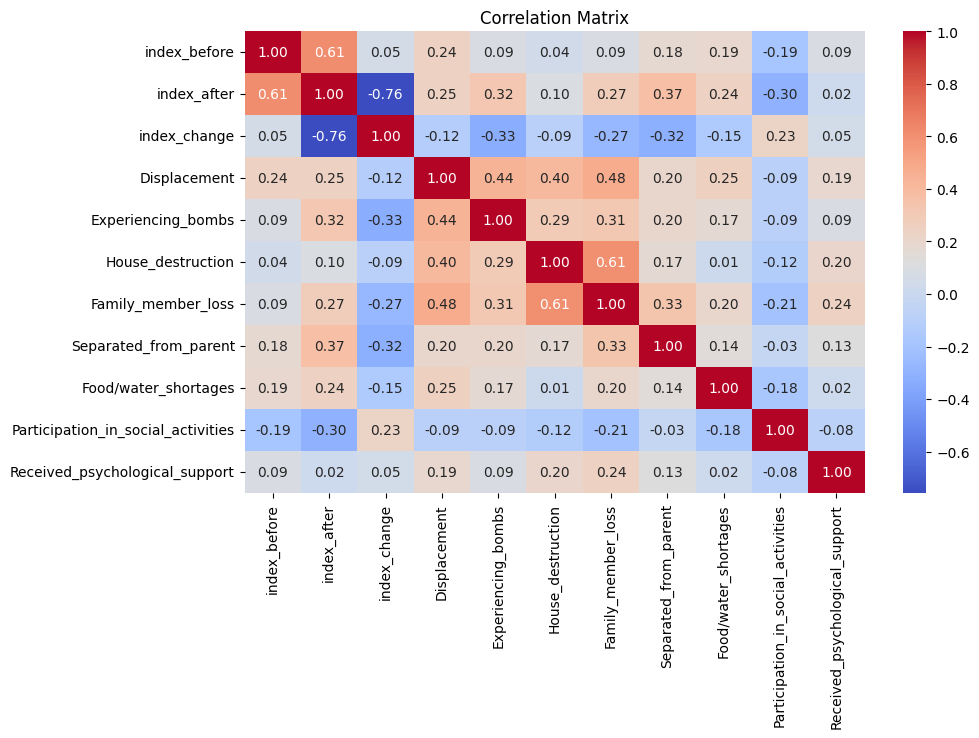

In [38]:
# Select columns for correlation analysis
corr_cols = ['index_before', 'index_after', 'index_change', 
             'Displacement', 'Experiencing_bombs', 'House_destruction',
             'Family_member_loss', 'Separated_from_parent',
             'Food/water_shortages', 'Participation_in_social_activities',
             'Received_psychological_support']

# Convert categorical variables to numeric if needed
for col in corr_cols:
    if df[col].dtype == 'object':
        df[col] = pd.Categorical(df[col]).codes

# Generate correlation matrix
corr_matrix = df[corr_cols].corr()

# Extract strongest correlations with mental health indices
idx_after_corrs = corr_matrix['index_after'].sort_values(ascending=False)
idx_change_corrs = corr_matrix['index_change'].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


<Figure size 1200x600 with 0 Axes>

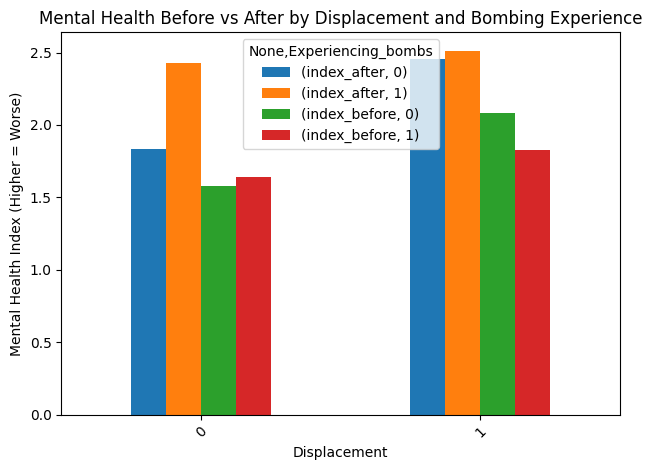

In [39]:

# Before vs After mental health index by displacement and bombing experience
plt.figure(figsize=(12, 6))
data = df.pivot_table(index='Displacement', columns='Experiencing_bombs',
                      values=['index_before', 'index_after'])
data.plot(kind='bar')
plt.title('Mental Health Before vs After by Displacement and Bombing Experience')
plt.ylabel('Mental Health Index (Higher = Worse)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('mental_health_by_displacement_bombs.png')


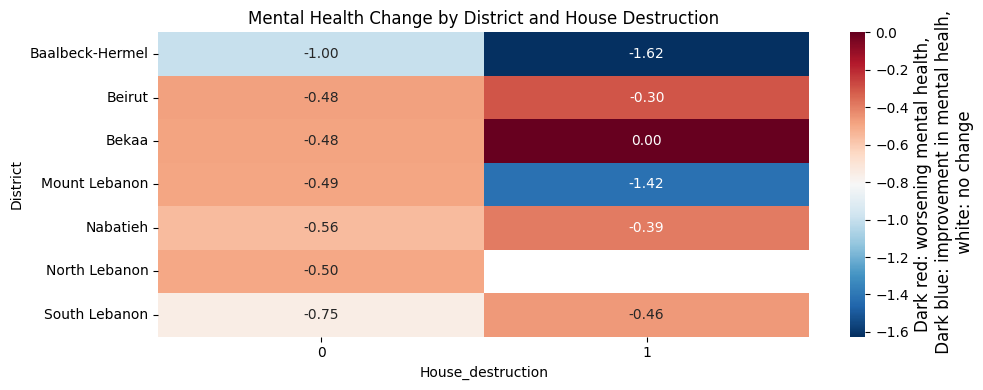

In [40]:
plt.figure(figsize=(10, 4))
heatmap_data = df.pivot_table(
    index='District', 
    columns='House_destruction',
    values='index_change'
)
ax = sns.heatmap(heatmap_data, cmap='RdBu_r', annot=True, fmt='.2f')

# Add title and color bar label
plt.title('Mental Health Change by District and House Destruction')
cbar = ax.collections[0].colorbar
cbar.set_label('Dark red: worsening mental health,\n Dark blue: improvement in mental healh,\n white: no change', fontsize=12)
plt.tight_layout()
plt.savefig('mental_health_by_district_destruction.png')


<Figure size 1000x600 with 0 Axes>

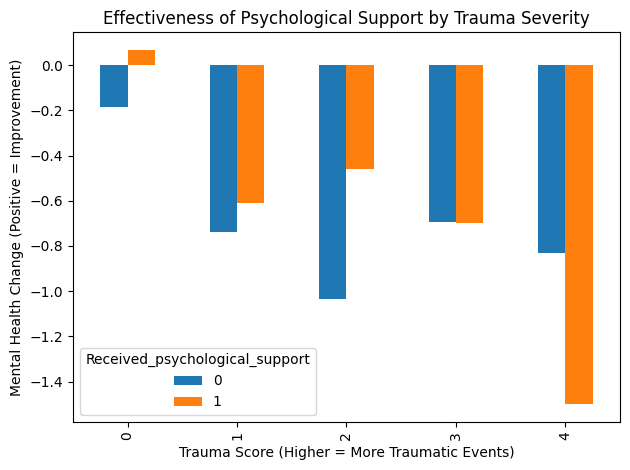

In [41]:

# Effectiveness of psychological support by trauma severity
plt.figure(figsize=(10, 6))
# Create a trauma severity score
df['trauma_score'] = (df['Experiencing_bombs'] + df['House_destruction'] + 
                      df['Family_member_loss'] + df['Separated_from_parent'])
trauma_support_data = df.pivot_table(
    index='trauma_score',
    columns='Received_psychological_support',
    values='index_change'
)
trauma_support_data.plot(kind='bar')
plt.title('Effectiveness of Psychological Support by Trauma Severity')
plt.xlabel('Trauma Score (Higher = More Traumatic Events)')
plt.ylabel('Mental Health Change (Positive = Improvement)')
plt.tight_layout()
plt.savefig('psych_support_by_trauma.png')

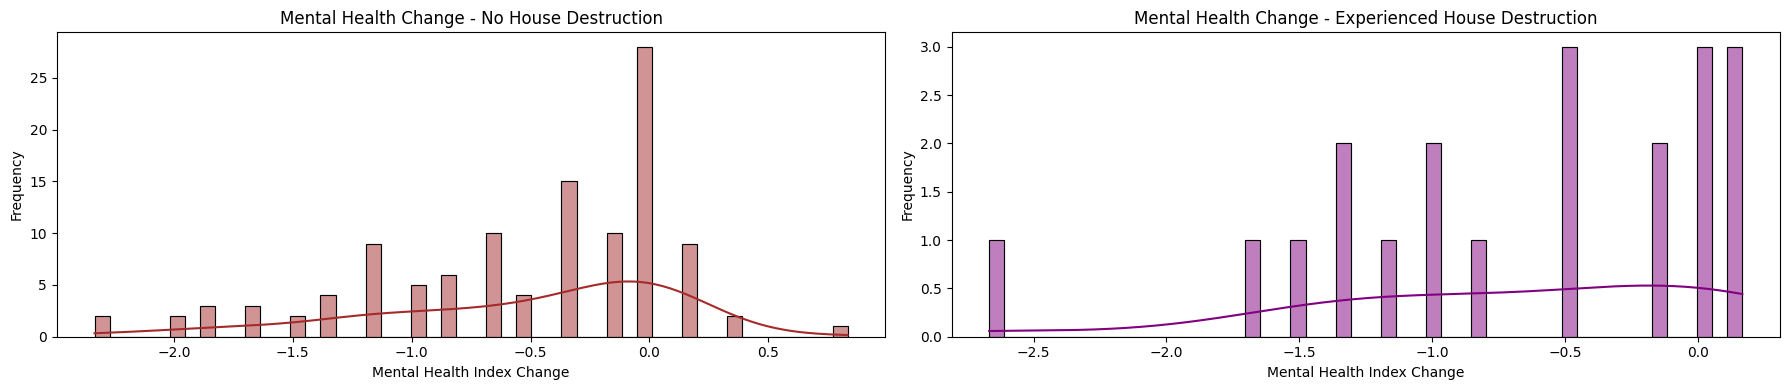

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(18, 4))

# Plot for individuals with no house destruction
sns.histplot(df[df['House_destruction'] == 0]['index_change'], bins=50, ax=ax[0], color='brown', kde=True)
ax[0].set_title('Mental Health Change - No House Destruction', fontsize=12)
ax[0].set_xlabel('Mental Health Index Change')
ax[0].set_ylabel('Frequency')

# Plot for individuals who experienced house destruction
sns.histplot(df[df['House_destruction'] == 1]['index_change'], bins=50, ax=ax[1], color='purple', kde=True)
ax[1].set_title('Mental Health Change - Experienced House Destruction', fontsize=12)
ax[1].set_xlabel('Mental Health Index Change')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [52]:
def pltViolin(subpltnum, colName, dfObj, hueCol=None):
    if ',' in str(subpltnum):
        nums = str(subpltnum).split(',')
        plt.subplot(int(nums[0]), int(nums[1]), int(nums[2]))
    else:
        plt.subplot(subpltnum)
    
    if hueCol is None:
        sns.violinplot(y=colName, data=dfObj)
    else:
        sns.violinplot(y=colName, data=dfObj, hue=hueCol)
    
    plt.xlabel("Mental Health Index")
    plt.ylabel("Distribution")
    plt.title(f"Distribution of {colName} by {hueCol}" if hueCol else f"Distribution of {colName}")

def pltBar(subpltnum, xCol, yCol, dfObj):
    if ',' in str(subpltnum):
        nums = str(subpltnum).split(',')
        plt.subplot(int(nums[0]), int(nums[1]), int(nums[2]))
    else:
        plt.subplot(subpltnum)
    
    sns.barplot(x=xCol, y=yCol, data=dfObj)
    plt.xlabel(xCol)
    plt.ylabel(yCol)
    plt.title(f"{yCol} by {xCol}")


def pltReg(subpltnum, xCol, yCol, dfObj):
    if ',' in str(subpltnum):
        nums = str(subpltnum).split(',')
        plt.subplot(int(nums[0]), int(nums[1]), int(nums[2]))
    else:
        plt.subplot(subpltnum)
    
    sns.regplot(x=xCol, y=yCol, data=dfObj)
    plt.xlabel(xCol)
    plt.ylabel(yCol)
    plt.title(f"Relationship Between {xCol} and {yCol}")


def pltBox(subpltnum, xCol, yCol, dfObj, hueCol=None):
    if ',' in str(subpltnum):
        nums = str(subpltnum).split(',')
        plt.subplot(int(nums[0]), int(nums[1]), int(nums[2]))
    else:
        plt.subplot(subpltnum)
    
    if hueCol is None:
        sns.boxplot(x=xCol, y=yCol, data=dfObj)
    else:
        sns.boxplot(x=xCol, y=yCol, data=dfObj, hue=hueCol)
    
    plt.xlabel(xCol)
    plt.ylabel(yCol)
    plt.title(f"{yCol} Distribution by {xCol} ({hueCol} Differentiation)" if hueCol else f"{yCol} Distribution by {xCol}")



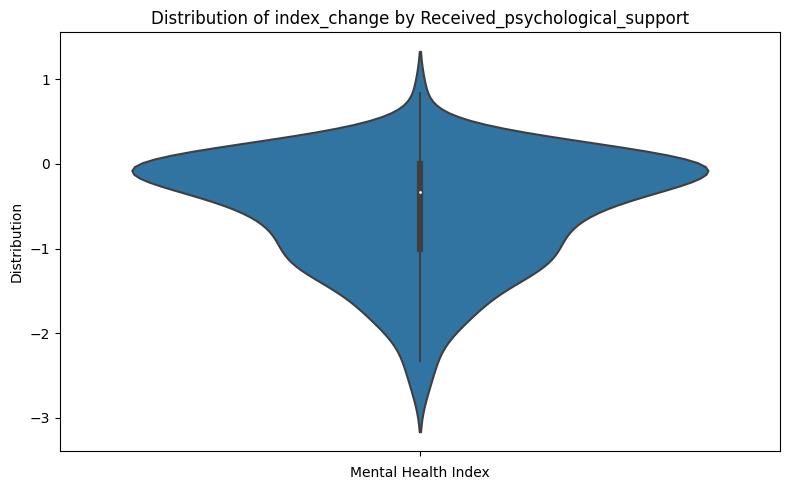

In [53]:
plt.figure(figsize=(8, 5))
pltViolin(111, 'index_change', df, hueCol='Received_psychological_support')
plt.tight_layout()
plt.show()


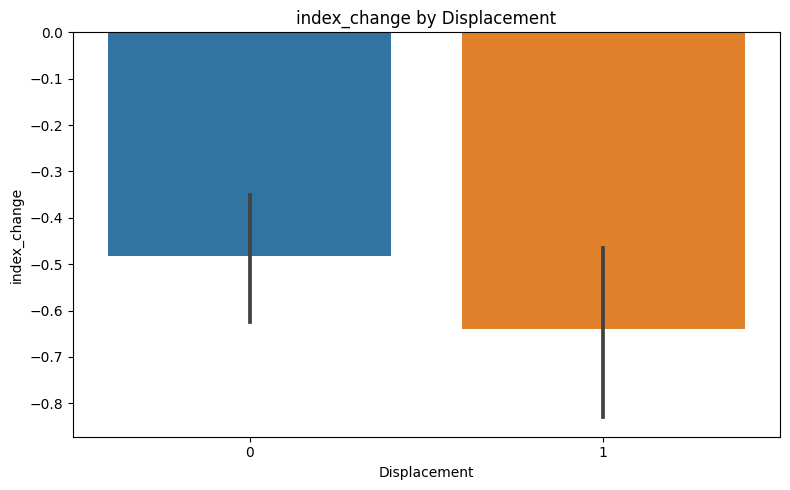

In [54]:
plt.figure(figsize=(8, 5))
pltBar(111, 'Displacement', 'index_change', df)
plt.tight_layout()
plt.show()


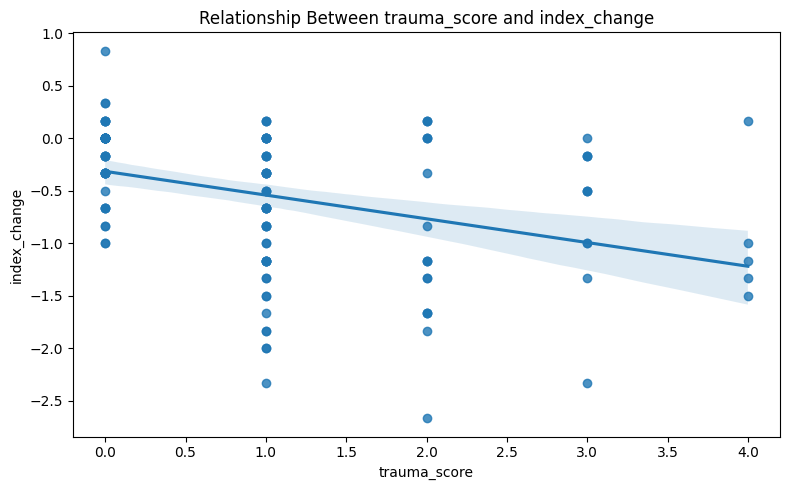

In [55]:
# Calculate trauma score (this could be based on several columns in your dataframe)
df['trauma_score'] = (df['Experiencing_bombs'] + df['House_destruction'] + 
                      df['Family_member_loss'] + df['Separated_from_parent'])

plt.figure(figsize=(8, 5))
pltReg(111, 'trauma_score', 'index_change', df)
plt.tight_layout()
plt.show()


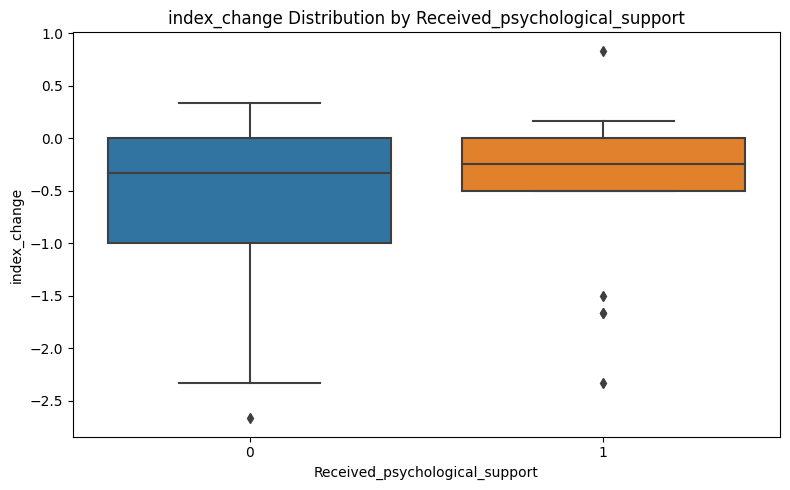

In [56]:
plt.figure(figsize=(8, 5))
pltBox(111, 'Received_psychological_support', 'index_change', df)
plt.tight_layout()
plt.show()
